<a href="https://colab.research.google.com/github/Ikbal-hand/Bengkel-Mang-Aris/blob/main/Kelompok_7_SD%3DSpam_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount google drive

### Subtask:
Mount Google Drive untuk mengakses data email spam.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load data

### Subtask:
Muat data dari file CSV ke dalam DataFrame pandas. Pastikan untuk mengidentifikasi kolom ke-2 sebagai teks email dan kolom ke-3 sebagai label spam/non-spam.


In [30]:
import pandas as pd

# Read the CSV file, specifying no header
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam - spam(1).csv', header=None)

# Rename columns
df = df.rename(columns={2: 'label', 1: 'text'})

# Display the first few rows
display(df.head())

,0,text,label,3,4,5
0,title,text,type,NaN,NaN,NaN
1,NaN,"Go until jurong point, crazy.. Available only ...",not spam,NaN,NaN,NaN
2,NaN,Ok lar... Joking wif u oni...,not spam,NaN,NaN,NaN
3,NaN,Free entry in 2 a wkly comp to win FA Cup fina...,spam,NaN,NaN,NaN
4,NaN,U dun say so early hor... U c already then say...,not spam,NaN,NaN,NaN


In [31]:
# Remove the first row which is the header
df = df[1:].copy()

# Display the first few rows again to verify
display(df.head())

,0,text,label,3,4,5
1,NaN,"Go until jurong point, crazy.. Available only ...",not spam,NaN,NaN,NaN
2,NaN,Ok lar... Joking wif u oni...,not spam,NaN,NaN,NaN
3,NaN,Free entry in 2 a wkly comp to win FA Cup fina...,spam,NaN,NaN,NaN
4,NaN,U dun say so early hor... U c already then say...,not spam,NaN,NaN,NaN
5,NaN,"Nah I don't think he goes to usf, he lives aro...",not spam,NaN,NaN,NaN


## Exploratory data analysis (eda)

### Subtask:
Lakukan analisis data eksplorasi untuk memahami struktur data, distribusi label spam/non-spam, dan karakteristik teks email. Ini mungkin melibatkan visualisasi seperti hitungan label dan panjang teks.


Label Distribution:
label
not spam    4825
spam         747
Name: count, dtype: int64


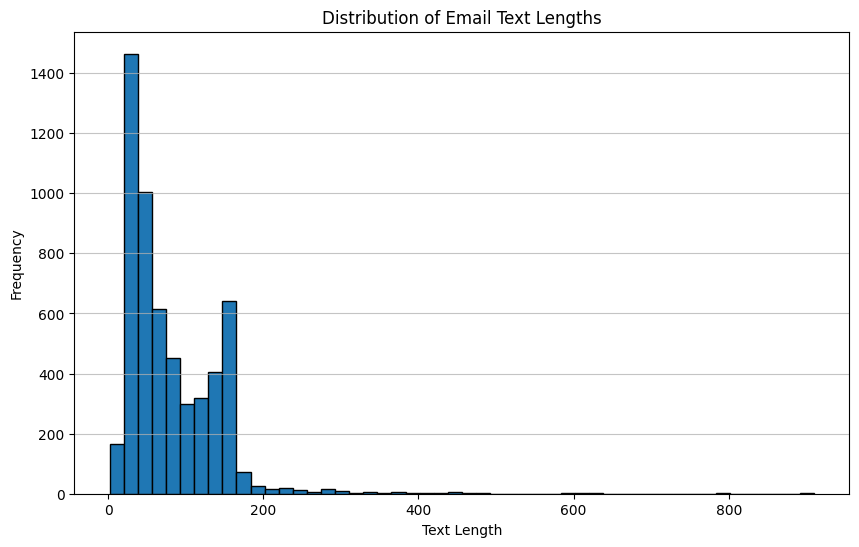


Text Length Descriptive Statistics:
count    5572.000000
mean       80.031945
std        59.622618
min         2.000000
25%        35.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: text_length, dtype: float64


In [32]:
import matplotlib.pyplot as plt

# Get the distribution of spam and non-spam labels
label_distribution = df['label'].value_counts()
print("Label Distribution:")
print(label_distribution)

# Calculate the length of each email text
df['text_length'] = df['text'].apply(len)

# Plot a histogram of the 'text_length' column
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, edgecolor='black')
plt.title('Distribution of Email Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Generate descriptive statistics for the 'text_length' column
text_length_stats = df['text_length'].describe()
print("\nText Length Descriptive Statistics:")
print(text_length_stats)

## Data preprocessing

### Subtask:
Bersihkan dan siapkan data teks untuk pemodelan. Ini mungkin termasuk tokenisasi, penghapusan stop words, stemming atau lematisasi, dan konversi teks menjadi representasi numerik (misalnya, TF-IDF).


In [33]:
# Download NLTK data if not already present
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stop words and lemmatize
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a string
    return ' '.join(processed_tokens)

# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Convert cleaned text to TF-IDF representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limit features to avoid excessive memory usage
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Display the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Shape of TF-IDF matrix: (5572, 5000)


## Model selection and training

### Subtask:
Pilih model klasifikasi (misalnya, Naive Bayes, SVM, atau model berbasis deep learning) dan latih menggunakan data yang telah diproses.


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)

# Instantiate the Multinomial Naive Bayes model
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

MultinomialNB()

## Model evaluation

### Subtask:
Evaluasi kinerja model menggunakan metrik yang sesuai (misalnya, akurasi, presisi, recall, F1-score) dan visualisasikan hasilnya (misalnya, confusion matrix).


Accuracy: 0.9704035874439462
Precision: 0.9915966386554622
Recall: 0.7866666666666666
F1-score: 0.8773234200743495


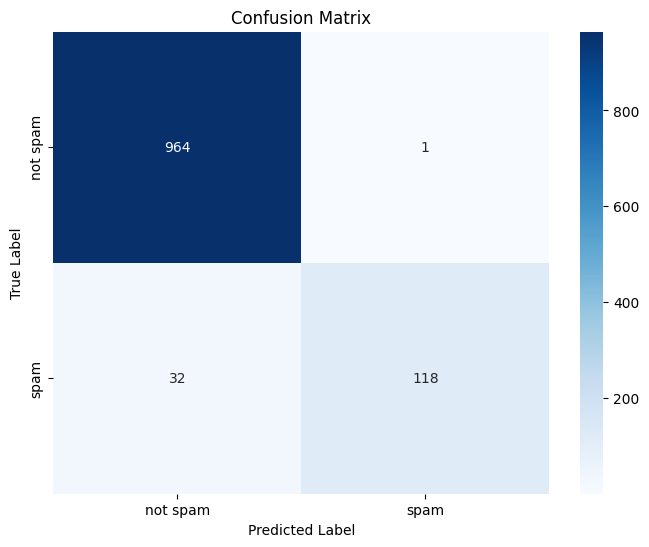

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['not spam', 'spam'])

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['not spam', 'spam'], yticklabels=['not spam', 'spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Spam detection

### Subtask:
Use the trained model to predict whether new emails are spam or not.


**Reasoning**:
Define example emails, preprocess them using the same steps as the training data, transform them using the fitted TF-IDF vectorizer, predict their labels using the trained model, and print the results.



In [37]:
# 1. Define a list of example new email texts.
new_emails = [
    "Congratulations! You've won a free prize!", # spam
    "Meeting scheduled for tomorrow at 10 AM.", # not spam
    "Urgent: Your account has been compromised. Click here to verify.", # spam
    "Here is the report you requested.", # not spam
    "Claim your exclusive discount now!", # spam
    "Invoice attached for your recent purchase.", # not spam
    "Limited time offer: Get 50% off!", # spam
    "Regarding your application status.", # not spam
    "You have a new message in your inbox.", # not spam
    "Free trial ending soon. Renew your subscription.", # spam
    "Important security alert for your account.", # spam
    "Project update and next steps.", # not spam
    "Your order has been shipped.", # not spam
    "Win a brand new iPhone - Enter now!", # spam
    "Newsletter subscription confirmation.", # not spam
    "Exclusive offer for our loyal customers.", # spam
    "Regarding the meeting minutes.", # not spam
    "Action required: Update your payment information.", # spam
    "Your feedback is important to us.", # not spam
    "Get rich quick! Invest in this amazing opportunity.", # spam
    "Regarding the document you sent.", # not spam
    "We need your help to fight spam.", # not spam
    "Your account has been credited with $100.", # spam
    "Meeting cancellation notice.", # not spam
    "Verify your email address to continue.", # spam
    "Job application received.", # not spam
    "Special offer just for you!", # spam
    "Regarding the project proposal.", # not spam
    "Claim your free gift card!", # spam
    "Follow up on our previous conversation.", # not spam
    "Your system is infected! Download this cleaner.", # spam
    "Regarding the contract details.", # not spam
    "You have been selected for a prize!", # spam
    "Meeting agenda for today.", # not spam
    "Your password has been reset.", # spam
    "Regarding the training session.", # not spam
    "Huge discounts on all products!", # spam
    "Regarding the quarterly report.", # not spam
    "Your winning lottery ticket number.", # spam
    "Regarding the client meeting.", # not spam
    "Exclusive access to our new service.", # spam
    "Regarding the budget proposal.", # not spam
    "Act now to avoid account suspension.", # spam
    "Regarding the performance review.", # not spam
    "Free money! Click here to claim.", # spam
    "Regarding the team meeting.", # not spam
    "Congratulations! You've been approved.", # spam
    "Regarding the product launch.", # not spam
    "Your credit score has been updated.", # not spam
    "Warning: Unusual activity on your account.", # spam
]

# 2. Apply the same preprocessing steps to the new email texts.
preprocessed_new_emails = [preprocess_text(email) for email in new_emails]

# 3. Transform the preprocessed new email texts into numerical features using the fitted TF-IDF vectorizer.
tfidf_new_emails = tfidf_vectorizer.transform(preprocessed_new_emails)

# 4. Use the trained model's .predict() method to predict the spam/non-spam label for the new email texts.
predictions = model.predict(tfidf_new_emails)

# 5. Print the original new email text and its predicted label.
for original_text, prediction in zip(new_emails, predictions):
    print(f"Email: '{original_text}'\nPredicted Label: {prediction}\n")

Email: 'Congratulations! You've won a free prize!'
Predicted Label: spam

Email: 'Meeting scheduled for tomorrow at 10 AM.'
Predicted Label: not spam

Email: 'Urgent: Your account has been compromised. Click here to verify.'
Predicted Label: spam

Email: 'Here is the report you requested.'
Predicted Label: not spam

Email: 'Claim your exclusive discount now!'
Predicted Label: spam

Email: 'Invoice attached for your recent purchase.'
Predicted Label: not spam

Email: 'Limited time offer: Get 50% off!'
Predicted Label: not spam

Email: 'Regarding your application status.'
Predicted Label: not spam

Email: 'You have a new message in your inbox.'
Predicted Label: not spam

Email: 'Free trial ending soon. Renew your subscription.'
Predicted Label: not spam

Email: 'Important security alert for your account.'
Predicted Label: not spam

Email: 'Project update and next steps.'
Predicted Label: not spam

Email: 'Your order has been shipped.'
Predicted Label: not spam

Email: 'Win a brand new iP